In [1]:
print('hello')

hello


In [6]:
import pandas as pd
document_df = pd.read_csv("C:/Users/Asus/Documents/STKI/Tugas_AKhir_Fixed/Obat_Bebas dan Bebas_Terbatas - products.csv")
document_df.head()

,title,description
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P..."
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig..."
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...


In [7]:
print(document_df.isnull().sum())
print("\n")
print(document_df.duplicated().sum())

title          0
description    0
dtype: int64


0


In [8]:
document_df['full_oobat'] = document_df['title'] + ' : ' + document_df['description']
document_df.head()

,title,description,full_oobat
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...,Tolak Angin Cair - Dus Isi 12 Sachet : Penjela...
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...,Cetirizine 10 mg 10 Tablet : Cetirizine HCI pa...
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P...",Tolak Linu Herbal - Dus Isi 5 Sachet : Tolak L...
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig...","Paratusin Tablet : New Product Launching ""Mand..."
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...,Mycorine Cream 15 Gr : Mycorine cream adalah o...


In [11]:
import re

def cleanResume(txt):
    cleantxt = re.sub(r'http\S+\s', ' ', txt)
    cleantxt = re.sub(r'RT|cc', ' ', cleantxt)
    cleantxt = re.sub(r'@\S+', ' ', cleantxt)
    cleantxt = re.sub(r'#\S+', ' ', cleantxt)
    cleantxt = re.sub(r'[%s]' % re.escape("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~ "), ' ', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt)
    cleantxt = re.sub(r'\s+', ' ', cleantxt)
    return cleantxt


In [12]:
document_df['full_oobat'] = document_df['full_oobat'].apply(lambda x: cleanResume(x))

In [13]:
document_df.head()

,title,description,full_oobat
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...,Tolak Angin Cair Dus Isi 12 Sachet Penjelasan ...
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...,Cetirizine 10 mg 10 Tablet Cetirizine HCI pada...
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P...",Tolak Linu Herbal Dus Isi 5 Sachet Tolak Linu ...
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig...",Paratusin Tablet New Product Launching Mandjur...
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...,Mycorine Cream 15 Gr Mycorine cream adalah oba...


In [14]:
#Case folding: ubah semua huruf pada kolom 'Isi_Artikel' menjadi huruf kecil
document_df['full_obat_preprocessed'] = document_df['full_oobat'].str.lower()

#Tampilkan 5 baris pertama setelah case folding
document_df.head()

,title,description,full_oobat,full_obat_preprocessed
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...,Tolak Angin Cair Dus Isi 12 Sachet Penjelasan ...,tolak angin cair dus isi 12 sachet penjelasan ...
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...,Cetirizine 10 mg 10 Tablet Cetirizine HCI pada...,cetirizine 10 mg 10 tablet cetirizine hci pada...
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P...",Tolak Linu Herbal Dus Isi 5 Sachet Tolak Linu ...,tolak linu herbal dus isi 5 sachet tolak linu ...
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig...",Paratusin Tablet New Product Launching Mandjur...,paratusin tablet new product launching mandjur...
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...,Mycorine Cream 15 Gr Mycorine cream adalah oba...,mycorine cream 15 gr mycorine cream adalah oba...


In [16]:
from nltk.tokenize import word_tokenize
#Tokenisasi: memecahkan kalimat menjadi token/kata
document_df['full_obat_preprocessed'] = document_df['full_obat_preprocessed'].apply(word_tokenize)

#Tampilkan 5 baris pertama hasil tokenisasi
document_df.head()

,title,description,full_oobat,full_obat_preprocessed
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...,Tolak Angin Cair Dus Isi 12 Sachet Penjelasan ...,"[tolak, angin, cair, dus, isi, 12, sachet, pen..."
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...,Cetirizine 10 mg 10 Tablet Cetirizine HCI pada...,"[cetirizine, 10, mg, 10, tablet, cetirizine, h..."
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P...",Tolak Linu Herbal Dus Isi 5 Sachet Tolak Linu ...,"[tolak, linu, herbal, dus, isi, 5, sachet, tol..."
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig...",Paratusin Tablet New Product Launching Mandjur...,"[paratusin, tablet, new, product, launching, m..."
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...,Mycorine Cream 15 Gr Mycorine cream adalah oba...,"[mycorine, cream, 15, gr, mycorine, cream, ada..."


In [18]:
#Import dan download stopwords resource
!pip install nltk
import nltk
nltk.download('stopwords')

#Import stopwords dari NLTK
from nltk.corpus import stopwords

#Stopwords berbahasa Indonesia
stopwords = stopwords.words('indonesian')

#Import dan download Sastrawi
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Buat stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Import resources untuk tokenisasi
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
#Stopword removal: menghapus kata-kata umum dan non-alfabet
document_df['full_obat_preprocessed'] = document_df['full_obat_preprocessed'].apply(
    lambda tokens: [word for word in tokens if word.isalpha() and word not in stopwords]
)
#Tampilkan hasil pertama setelah stopword removal
document_df.head()

,title,description,full_oobat,full_obat_preprocessed
0,Tolak Angin Cair - Dus Isi 12 Sachet,Penjelasan Singkat - Terbuat dari bahan-bahan ...,Tolak Angin Cair Dus Isi 12 Sachet Penjelasan ...,"[tolak, angin, cair, dus, isi, sachet, penjela..."
1,Cetirizine 10 mg 10 Tablet,Cetirizine HCI pada dosis aktif secara farmako...,Cetirizine 10 mg 10 Tablet Cetirizine HCI pada...,"[cetirizine, mg, tablet, cetirizine, hci, dosi..."
2,Tolak Linu Herbal - Dus Isi 5 Sachet,"Tolak Linu Herbal terbuat dari ekstrak ""Cabe P...",Tolak Linu Herbal Dus Isi 5 Sachet Tolak Linu ...,"[tolak, linu, herbal, dus, isi, sachet, tolak,..."
3,Paratusin Tablet,"New Product Launching ""Mandjur Thermosense Dig...",Paratusin Tablet New Product Launching Mandjur...,"[paratusin, tablet, new, product, launching, m..."
4,Mycorine Cream 15 Gr,Mycorine cream adalah obat yang digunakan untu...,Mycorine Cream 15 Gr Mycorine cream adalah oba...,"[mycorine, cream, gr, mycorine, cream, obat, m..."


In [21]:
!pip install wordcloud

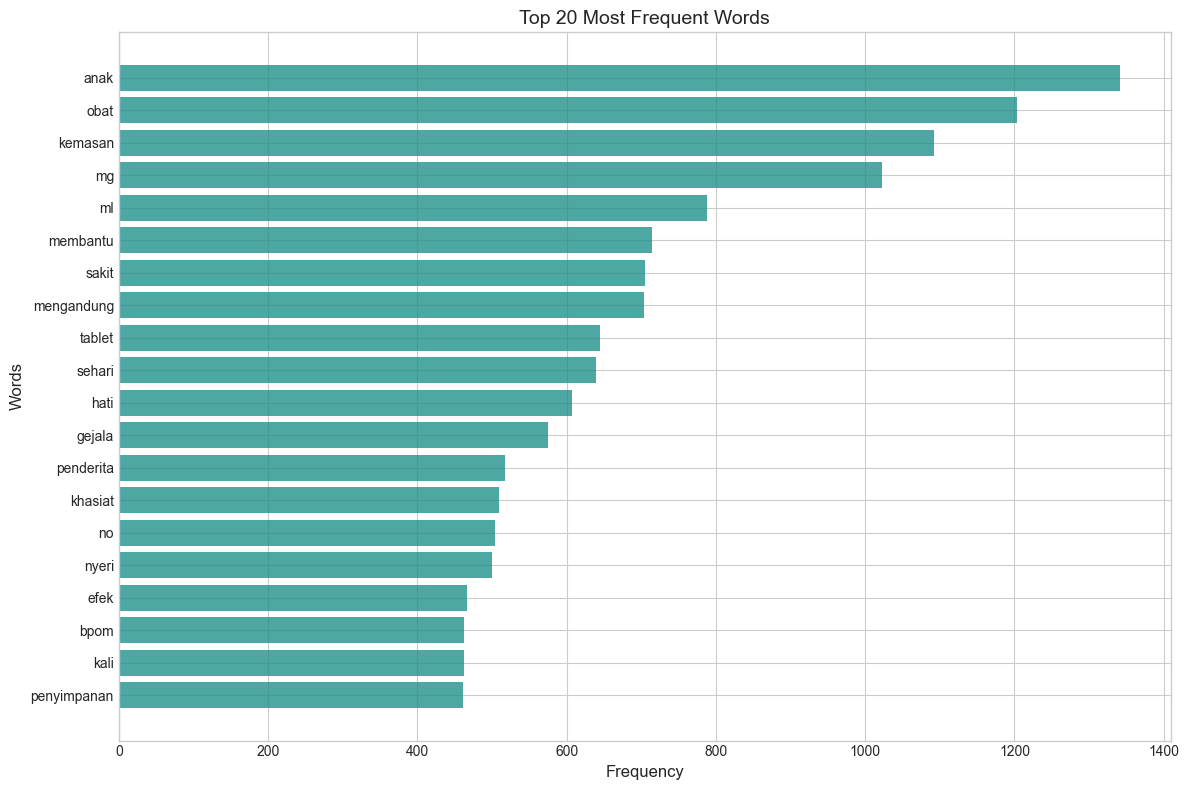

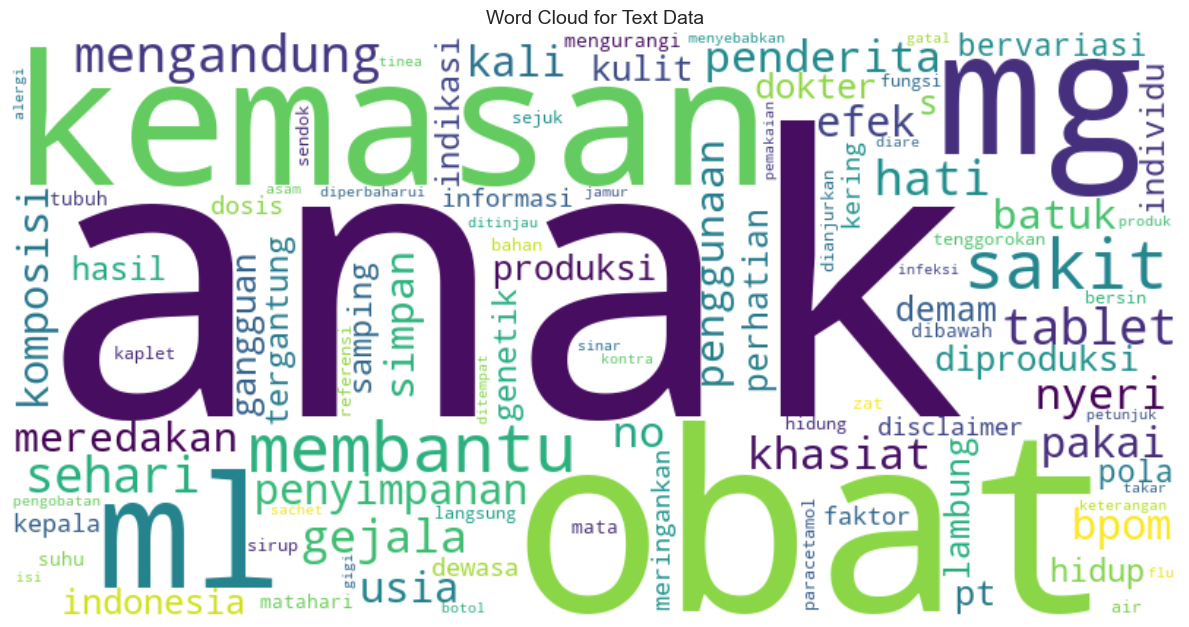

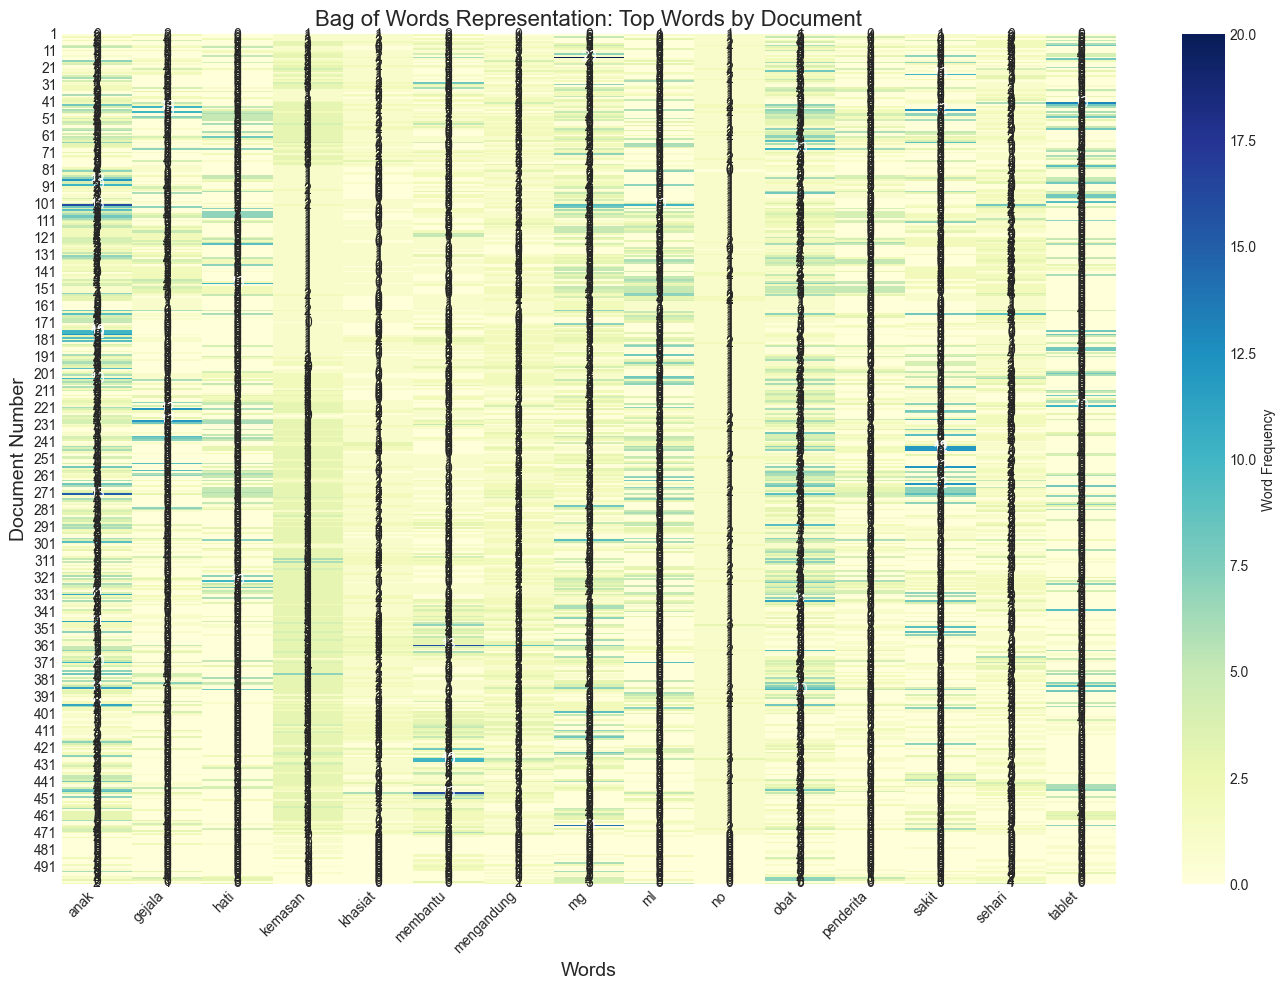

Bag of Words Analysis Summary:
Total documents: 500
Total unique words: 5284
Total words: 79496

Top 10 words:
      Word  Frequency  Percentage
      anak       1342    1.688135
      obat       1203    1.513284
   kemasan       1092    1.373654
        mg       1023    1.286857
        ml        788    0.991245
  membantu        715    0.899416
     sakit        705    0.886837
mengandung        704    0.885579
    tablet        645    0.811362
    sehari        639    0.803814


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns

# This code assumes you already have a DataFrame called 'document_df'
# with a column named 'full_artikel_preprocessed' containing lists of preprocessed words

# Method 1: Simple word frequency count from DataFrame column
def count_word_frequencies(series_of_word_lists):
    # Flatten the lists of words from all documents
    all_words = []
    for word_list in series_of_word_lists:
        all_words.extend(word_list)

    # Count frequencies
    word_counts = Counter(all_words)
    return word_counts

# Count word frequencies from the DataFrame column
word_counts = count_word_frequencies(document_df['full_obat_preprocessed'])

# Get the top N most common words
N = 20
top_words = word_counts.most_common(N)
words, counts = zip(*top_words)

# Create a DataFrame for easier plotting
df = pd.DataFrame({'Word': words, 'Count': counts})
df = df.sort_values('Count', ascending=True)  # Sort for horizontal bar plot

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')  # Use a nice style
colors = sns.color_palette("viridis", n_colors=1)[0]  # Get a single color from the viridis palette

# Plot Method 1: Bar Plot
plt.figure(figsize=(12, 8))
plt.barh(df['Word'], df['Count'], color=colors, alpha=0.8)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top {} Most Frequent Words'.format(N), fontsize=14)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.savefig('word_frequency_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Method 2: Word Cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=100,
                     contour_width=1,
                     contour_color='steelblue').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data', fontsize=14)
plt.tight_layout()
plt.savefig('word_cloud.png', dpi=300, bbox_inches='tight')
plt.show()

# Method 3: Using scikit-learn to create true bag of words matrix
from sklearn.feature_extraction.text import CountVectorizer

# Prepare data for CountVectorizer (join lists into strings)
text_docs = [' '.join(doc) for doc in document_df['full_obat_preprocessed']]

# Create and fit the CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_docs)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with word frequencies per document
bow_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Add document indices
bow_df.index.name = 'Document'
bow_df.index = bow_df.index + 1  # Start from 1 instead of 0

# Plot Method 4: Heatmap of word frequencies across documents (only show top words)
# Get the most common words for the heatmap
top_words_set = set([word for word, _ in word_counts.most_common(15)])
heatmap_df = bow_df[[col for col in bow_df.columns if col in top_words_set]]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, cmap='YlGnBu', annot=True, fmt='d',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag of Words Representation: Top Words by Document', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Document Number', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bow_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a summary dataframe of the top words
summary_df = pd.DataFrame({
    'Word': [word for word, _ in word_counts.most_common(10)],
    'Frequency': [count for _, count in word_counts.most_common(10)],
    'Percentage': [count/sum(word_counts.values())*100 for _, count in word_counts.most_common(10)]
})

print("Bag of Words Analysis Summary:")
print(f"Total documents: {len(document_df)}")
print(f"Total unique words: {len(word_counts)}")
print(f"Total words: {sum(word_counts.values())}")
print("\nTop 10 words:")
print(summary_df.to_string(index=False))


In [25]:
!pip install sentence-transformers

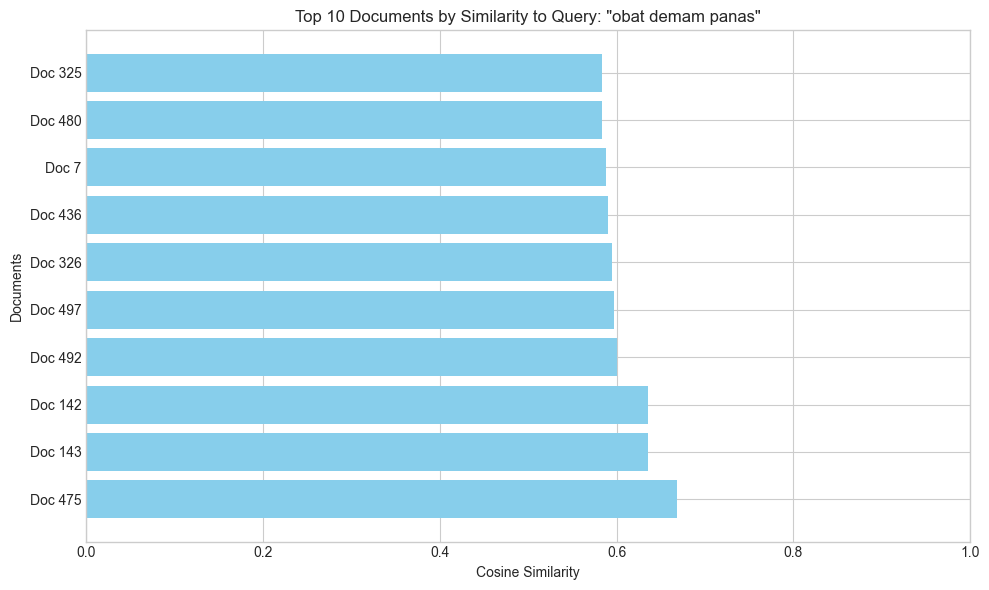

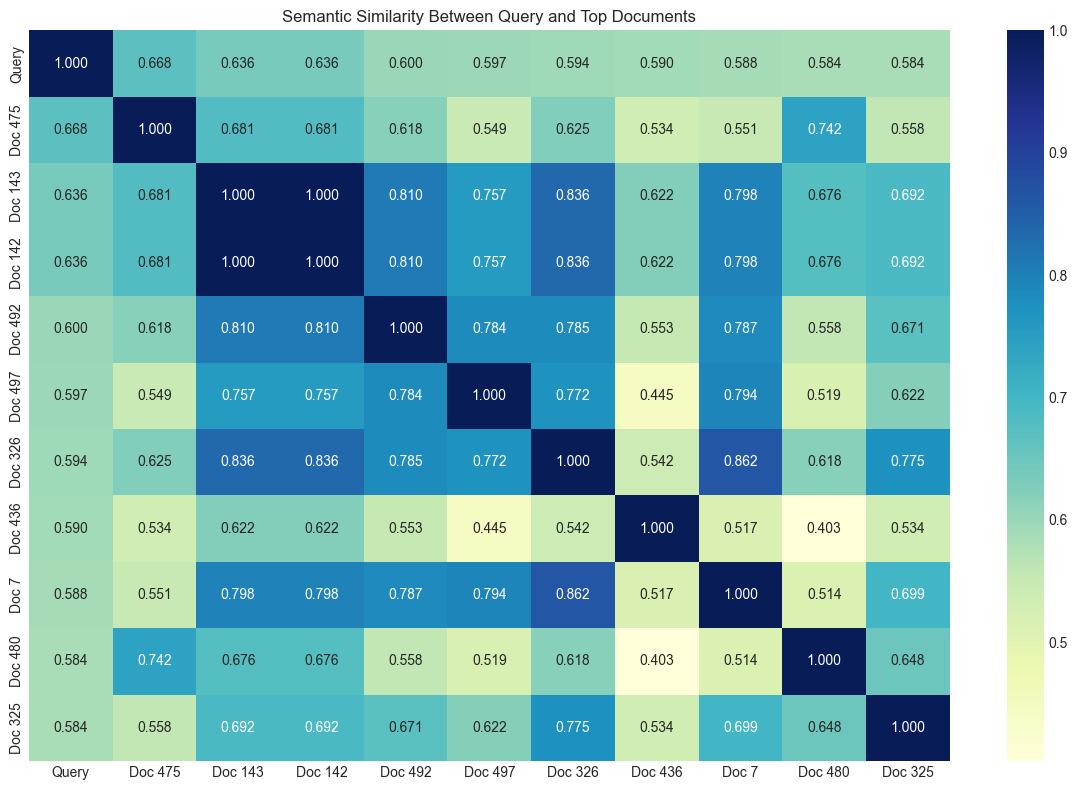


Vector Space Model Search Results for: 'obat demam panas'
Found 30 relevant documents

Document 475 - Similarity: 0.6681
Medicine Title: Calorex Syrup
Lexical overlap terms: obat
Text: calorex syrup sirup obat batuk disertai flu tersedia kemasan botol jeruk obat dibeli resep dokter
--------------------------------------------------
Document 143 - Similarity: 0.6356
Medicine Title: Termorex Plus Sirup 60 mL
Lexical overlap terms: obat, demam
Text: termorex plus sirup ml termorex plus sirup obat sirup anak kandungan bahan bermanfaat meringankan gejala flu demam sakit kepala hidung tersumbat bersi...
--------------------------------------------------
Document 142 - Similarity: 0.6356
Medicine Title: Termorex Plus Sirup 30 mL
Lexical overlap terms: obat, demam
Text: termorex plus sirup ml termorex plus sirup obat sirup anak kandungan bahan bermanfaat meringankan gejala flu demam sakit kepala hidung tersumbat bersi...
--------------------------------------------------
Document 492 - Simila

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
import re

def VSMModel(Pencarian, document_df):
    """
    Vector Space Model (VSM) implementation using Sentence Transformers and cosine similarity.

    Parameters:
    -----------
    Pencarian : str
        The search query string
    document_df : pandas DataFrame
        DataFrame containing preprocessed documents in 'full_artikel_preprocessed' column

    Returns:
    --------
    pd.DataFrame
        DataFrame with search results and similarity scores
    """
    # Initialize the sentence transformer model
    embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
    
    # Get documents from the DataFrame
    documents = document_df['full_obat_preprocessed']
    
    # Process query
    query = Pencarian
    try:
        tokenized_query = word_tokenize(query)
    except:
        # If NLTK word_tokenize fails, use simple splitting
        tokenized_query = query.split()
    
    # Join the tokens into strings for the transformer (it expects strings, not lists)
    preprocessed_documents = [' '.join(doc) if isinstance(doc, list) else doc for doc in documents]
    preprocessed_query = ' '.join(tokenized_query) if isinstance(tokenized_query, list) else query
    
    # Encode the documents and query using the transformer model
    document_embeddings = embedding_model.encode(preprocessed_documents)
    query_embedding = embedding_model.encode([preprocessed_query])[0]
    
    # Calculate cosine similarities
    cosine_similarities = cosine_similarity([query_embedding], document_embeddings)[0]
    
    # Create results with document info and similarity scores
    results = []
    for i, similarity in enumerate(cosine_similarities):
        if similarity > 0.55:  # Only include documents with similarity above 0.55
            # Get original text if available, otherwise use preprocessed text
            original_text = document_df.iloc[i].get('full_artikel', ' '.join(documents[i]) if isinstance(documents[i], list) else documents[i])
            
            doc_terms = set(documents[i]) if isinstance(documents[i], list) else set(word_tokenize(documents[i]))
            query_terms = set(tokenized_query)
            matching_terms = list(doc_terms.intersection(query_terms))
            
            results.append({
                'document_id': i,
                'title': document_df.iloc[i]['title'],  # Add medicine title
                'similarity': similarity,
                'matching_terms': matching_terms,
                'original_text': original_text[:150] + "..." if len(original_text) > 150 else original_text
            })


    
    # Create DataFrame and sort by similarity
    results_df = pd.DataFrame(results) if results else pd.DataFrame(
        columns=['document_id', 'similarity', 'matching_terms', 'original_text']
    )
    
    if not results_df.empty:
        results_df = results_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)
    
    # Visualize top results by similarity
    if not results_df.empty:
        plt.figure(figsize=(10, 6))
        top_n = min(len(results_df), 10)  # Show at most top 10
        
        plt.barh(
            [f"Doc {row['document_id']}" for _, row in results_df.iloc[:top_n].iterrows()],
            [row['similarity'] for _, row in results_df.iloc[:top_n].iterrows()],
            color='skyblue'
        )
        plt.xlabel('Cosine Similarity')
        plt.ylabel('Documents')
        plt.title(f'Top {top_n} Documents by Similarity to Query: "{Pencarian}"')
        plt.xlim(0, 1.0)  # Cosine similarity is between 0 and 1
        plt.tight_layout()
        plt.show()
        
        # Instead of TF-IDF heatmap, we can visualize embedding similarities
        if top_n > 1:
            plt.figure(figsize=(12, 8))
            
            # Get embeddings for top documents
            top_doc_indices = results_df['document_id'].iloc[:top_n].tolist()
            top_docs = [preprocessed_documents[i] for i in top_doc_indices]
            
            # Include query in the similarity matrix
            all_texts = [preprocessed_query] + top_docs
            all_embeddings = embedding_model.encode(all_texts)
            
            # Calculate pairwise similarities
            similarity_matrix = cosine_similarity(all_embeddings)
            
            # Create heatmap
            sns.heatmap(
                similarity_matrix,
                annot=True,
                fmt=".3f",
                cmap="YlGnBu",
                xticklabels=["Query"] + [f"Doc {idx}" for idx in top_doc_indices],
                yticklabels=["Query"] + [f"Doc {idx}" for idx in top_doc_indices]
            )
            plt.title('Semantic Similarity Between Query and Top Documents')
            plt.tight_layout()
            plt.show()
    
    # Print the results in a readable format
    print(f"\nVector Space Model Search Results for: '{Pencarian}'")
    print(f"Found {len(results_df)} relevant documents\n")
    
    if not results_df.empty:
        for idx, row in results_df.iterrows():
            print(f"Document {row['document_id']} - Similarity: {row['similarity']:.4f}")
            print(f"Medicine Title: {row['title']}")
            if row['matching_terms']:
                print(f"Lexical overlap terms: {', '.join(row['matching_terms'])}")
            print(f"Text: {row['original_text']}")
            print("-" * 50)
    return results_df

def highlight_vsm_matches(text, matching_terms):
    """Highlight matching terms in the original text"""
    highlighted = text
    for term in matching_terms:
        pattern = re.compile(r'\b' + re.escape(term) + r'\b', re.IGNORECASE)
        highlighted = pattern.sub(f"**{term}**", highlighted)
    return highlighted

# Example usage:
results = VSMModel("obat demam panas", document_df)